In [21]:
import numpy as np
np.random.seed(2023)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# I. Graph Terminology

- A **graph** is a collection of nodes (vertices) and edges that connect the nodes.<br>
- **Adjacent nodes** are nodes that are connected by at least one edge.<br>
- A **path** is any sequence of adjacent nodes, regardles of the direction of the edges that join them. E.g. A-->B<--C is a path.<br>
- A **directed path** is a path with directed edges that all point in the same direction. E.g. A-->B-->C.<br>
- X is an **ancestor** of Y if there is a directed path that starts at X and ends at Y. Then, Y is called a **descendant** of X (de(X)).
- A **directed acyclical graph (DAG)** is a graph that has only directed edges and no cycles.
- **Immortality** is a three-node DAG where two parents have the same child and are not connected. The child is called a **collider**.

# II. Bayesian Networks and Causal Graphs

Statistical modelling (no causality):<br>
$P(x_1, x_2, ..., x_n) = P(x_1) * P(x_2|x_1) * ... * P(x_n|x_{n-1},...,x_2, x_1)$ (chain rule of probability)


**Local Markov assumption**<br>
Given its parents in the DAG, X is independent of all of its non-descendants.

**Bayesian network factorization**<br>
$P(x_1, x_2, ..., x_n) = P(x_1|\text{pa}_{1}) * P(x_2|\text{pa}_{2}) * ... * P(x_n|\text{pa}_{n})$

The local Markov assumption imples Bayesian network factorization, and vice versa. Hence, they are equivalent!

**Minimality assumption**
1. Local Markov assumption
2. Adjacent nodes in the DAG are dependent

**What is a cause?**<br>
A variable X is a cause of variable Y if Y can change in response to changes in X.

**Causal edges assumption**<br>
In a directed graph, every parent is a direct cause of all its children.

# III. The Basic Building Blocks of Graphs

- Two nodes
- Chain
- Fork
- Immorality

#### Berkson's paradox
$X_{1} \sim N(0, 1)$<br>
$X_{3} \sim N(0, 1)$<br>
$X_{2} = X_{1} + X_{3}$<br><br>

$Cov(X_{1}, X_{3}) = \mathop{\mathbb{E}} [(X_{1}-\mathop{\mathbb{E}}(X_1))(X_{3}-\mathop{\mathbb{E}}(X_3))] = \mathop{\mathbb{E}} [X_{1}X_{3} - X_{1}\mathop{\mathbb{E}}(X_3) - X_{3}\mathop{\mathbb{E}}(X_1) + \mathop{\mathbb{E}}(X_1)\mathop{\mathbb{E}}(X_3)] = \mathop{\mathbb{E}} [X_{1}X_{3}] = 0$ since $X_{1}$ and $X_{3}$ are statistically independent and have a zero mean.<br><br>

$Cov(X_{1}, X_{3} | X_{2}=x) = \mathop{\mathbb{E}} [(X_{1}-\mathop{\mathbb{E}}(X_1))(X_{3}-\mathop{\mathbb{E}}(X_3)) | X_{2}=x] = \mathop{\mathbb{E}} [X_{1}X_{3} | X_{2}=x]$<br>
Now use that $X_{3} = X_{2} - X_{1}$:<br>
$Cov(X_{1}, X_{3} | X_{2}=x) = \mathop{\mathbb{E}} [X_{1} (X_{2} - X_{1}) | X_{2}=x] = \mathop{\mathbb{E}} [X_{1} (x - X_{1})] = x \mathop{\mathbb{E}}[X_{1}] - \mathop{\mathbb{E}}[X_{1}^{2}] =  -\mathop{\mathbb{E}}[X_{1}^{2}] = -Var(X_{1}) = -1$<br>
Therefore, $X_{1}$ and  $X_{3}$ are statistically dependent given $X_2$.

In [16]:
x1x3_mean = np.array([0, 0])
x1x2_cov = np.array(
    [
        [1, 0], 
        [0, 1]
    ]
)

x1x3_sim = np.random.multivariate_normal(mean=x1x3_mean, cov=x1x2_cov, size=10_000)
x1 = x1x3_sim[:, 0]
x3 = x1x3_sim[:, 1]
x2 = x1 + x3

Covariance: -0.002


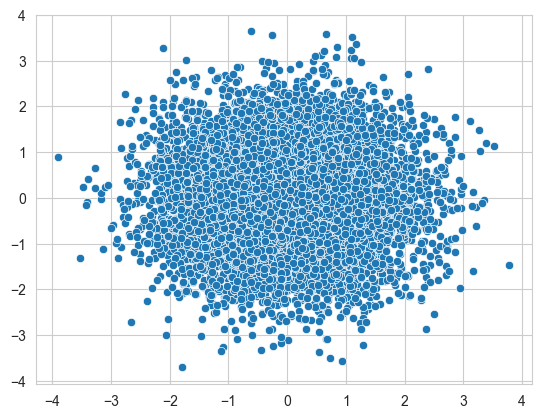

In [29]:
print('Covariance:', round(np.cov(x1, x3)[0, 1], 3))
sns.scatterplot(
    x=x1, y=x3
);

Covariance: -0.32


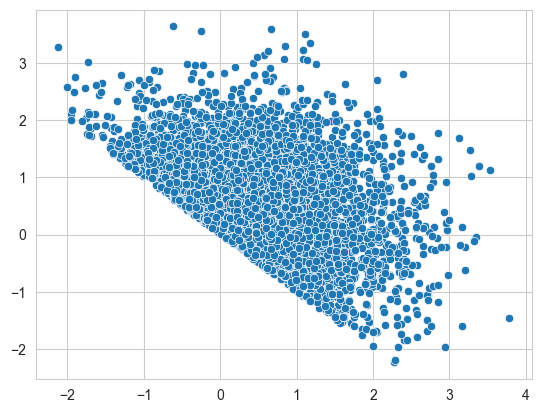

In [30]:
x1_subset = x1[x2 > 0]
x3_subset = x3[x2 > 0]


print('Covariance:', round(np.cov(x1_subset, x3_subset)[0, 1], 3))
sns.scatterplot(
    x=x1_subset, y=x3_subset
);

# IV. The Flow of Association and Causation

**Blocked path**<br>
A path between nodes X and Y is **blocked** by a (potentially empty) conditioning set Z if either of the following is true:<br>
1. Along the path there is a chain ...-->W-->... or a fork ...<--W-->... where W is conditioned on (i.e. W $\in$ Z)
2. There is a collider W along the path that is not conditioned on (W $\notin$ Z) and none of its descendants are conditioned on (de(W) $\notin$ Z).

Unblocked path is a path which is not blocked (a complement of a blocked path).

**d-separation**<br>
Two (sets of) nodes X and Y are d-separated by a set of nodes Z if all of the paths between (any node in) X and (any node in) Y are blocked by Z. In other words, association does not "flow" between X and Y when conditioning on Z.<br>
If there is at least one unblocked path between X and Y, X and Y are **d-connected**.

**Global Markov assumption**<br>
Given that $\mathop{\mathbb{P}}$ is Markov w.r.t. a causal graph $\mathop{\mathbb{G}}$ (the local Markov assumption is satisfied), <br>
if X and Y are d-separated in $\mathop{\mathbb{G}}$ conditioned on Z, that is, $X\perp \!\!\! \perp_{\mathop{\mathbb{G}}}Y|Z$,<br>
then X and Y are independent in distribution $\mathop{\mathbb{P}}$ conditioned on Z, that is, $X\perp \!\!\! \perp_{\mathop{\mathbb{P}}}Y|Z$.<br>

Global Markov assumption, local Markov assumption and Bayesian network factorization are all equivalent! The umbrella term is **Markov assumption**.